# Sentiment Analysis

This project outlines the process of sentiment analysis, from data collection to model evaluation, using a
combination of manual and API-based data collection, data exploration, preprocessing techniques, and model development and training.

The primary objectives of this sentiment analysis project are to classify comments into sentiment categories (positive, neutral, negative) and compare the performance of traditional machine learning (SVM) and deep learning (BERT) models.

# Data Collection:

1. YouTube API
2. Manual copy/paste

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
import nltk
import joblib

In [2]:

# Reading data
df = pd.read_csv('data/data.csv', delimiter=',', encoding='latin1')



In [3]:
df.head()

,Comments,Sentiment
0,The music is phenomenal. It really pulls you i...,neutral
1,"Well, if Tolkien didnot write this and it has ...",negative
2,The Lord of the Rings fails to capture the sub...,negative
3,Not even Melkor could have corrupted Middle Ea...,negative
4,Those two keeping score will never stop being ...,positive


In [4]:
# column names
print(df.columns)

Index(['Comments', 'Sentiment'], dtype='object')


# Data Exploration

1. Class distribution
2. Null check

In [5]:
#Distribution of class 
class_distribution = df['Sentiment'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
negative    610
neutral     604
positive    598
Name: Sentiment, dtype: int64


In [6]:
# # Replace 'Negative ' with 'Negative' in the 'Sentiment' column
# df['Sentiment'] = df['Sentiment'].replace({'Negative ': 'Negative'})

# class_distribution = df['Sentiment'].value_counts()
# print("Class Distribution:")
# print(class_distribution)


In [7]:
sentiment_counts = df['Sentiment'].value_counts()

# Print total number of sentiments
total_sentiments = len(df['Sentiment'])
print("Total:", total_sentiments)

Total: 1812


In [8]:
#Checking NUll
print("Null Values Before:")
print(df.isnull().sum())

Null Values Before:
Comments     0
Sentiment    0
dtype: int64


# Data Processing:

1. Stop-word removel
2. Lowercasing
3. Stemming and Lemmatizattion
4. Tokenization
5. TF-IDF

In [9]:
# Tokenization, remove stopwords, punctuation, frequent words, rare words, stemming, lemmatization, and emojis
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Remove emojis
    tokens = [word for word in tokens if word.isalnum()]  # Removes emojis and special characters
    return ' '.join(tokens)

# Applying preprocessing to each comment
df['Processed_Comment'] = df['Comments'].apply(preprocess_text)


In [10]:
# Displaying original, tokenized, and lemmatized comments
for index in range(5):  # Displaying the first 5 comments for illustration
    original_comment = df['Comments'].iloc[index]
    tokenized_comment = word_tokenize(original_comment)
    lemmatized_comment = [lemmatizer.lemmatize(word) for word in tokenized_comment]
    
    print(f"Original Comment: {original_comment}")
    print(f"Tokenized Comment: {tokenized_comment}")
    print(f"Lemmatized Comment: {lemmatized_comment}\n")


Original Comment: The music is phenomenal. It really pulls you into the fantasy world they've created.
Tokenized Comment: ['The', 'music', 'is', 'phenomenal', '.', 'It', 'really', 'pulls', 'you', 'into', 'the', 'fantasy', 'world', 'they', "'ve", 'created', '.']
Lemmatized Comment: ['The', 'music', 'is', 'phenomenal', '.', 'It', 'really', 'pull', 'you', 'into', 'the', 'fantasy', 'world', 'they', "'ve", 'created', '.']

Original Comment: Well, if Tolkien didnot write this and it has a low IMDb rating then it must not be safe watching.
Tokenized Comment: ['Well', ',', 'if', 'Tolkien', 'didnot', 'write', 'this', 'and', 'it', 'has', 'a', 'low', 'IMDb', 'rating', 'then', 'it', 'must', 'not', 'be', 'safe', 'watching', '.']
Lemmatized Comment: ['Well', ',', 'if', 'Tolkien', 'didnot', 'write', 'this', 'and', 'it', 'ha', 'a', 'low', 'IMDb', 'rating', 'then', 'it', 'must', 'not', 'be', 'safe', 'watching', '.']

Original Comment: The Lord of the Rings fails to capture the subtleties of Tolkien's p

In [11]:
# # Sentiment labels to numerical values
# label_encoder = LabelEncoder()
# df['Sentiment_Encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [12]:
# Sentiment labels to numerical values
label_encoder = LabelEncoder()
df['Sentiment_Encoded'] = label_encoder.fit_transform(df['Sentiment'])


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Comment'],
    df['Sentiment_Encoded'],
    test_size=0.2,
    random_state=42,
    stratify=df['Sentiment_Encoded']  #  stratify to ensure equal distribution
)


In [14]:
# Display the value counts for y_train
print("Distribution of Sentiment Classes in y_train:")
print(y_train.value_counts())

# Display the value counts for y_test
print("\nDistribution of Sentiment Classes in y_test:")
print(y_test.value_counts())


Distribution of Sentiment Classes in y_train:
0    488
1    483
2    478
Name: Sentiment_Encoded, dtype: int64

Distribution of Sentiment Classes in y_test:
0    122
1    121
2    120
Name: Sentiment_Encoded, dtype: int64


In [15]:
# Vectorization of the processed comments using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


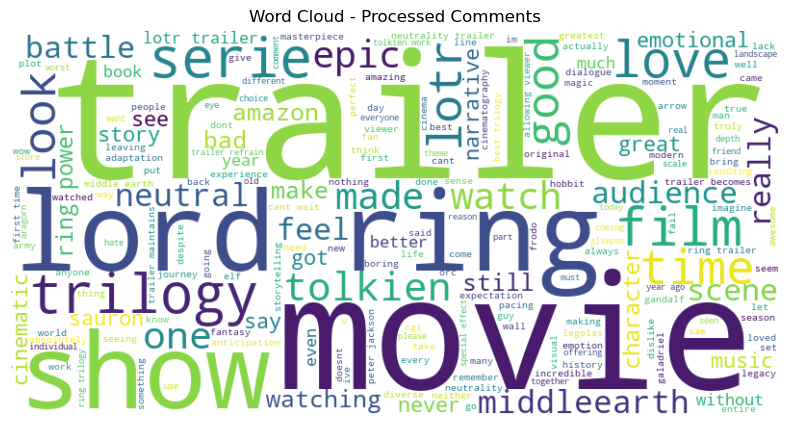

In [16]:
from wordcloud import WordCloud


# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['Processed_Comment']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Processed Comments')
plt.show()

## Model Training

# SVM



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Initialize  and traning SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [19]:
# Predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

In [20]:

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)


Accuracy: 0.6887052341597796
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       122
           1       0.68      0.64      0.66       121
           2       0.64      0.68      0.66       120

    accuracy                           0.69       363
   macro avg       0.69      0.69      0.69       363
weighted avg       0.69      0.69      0.69       363



### SVM with HyperParameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf' and 'poly'
}

In [22]:
# Initialize SVM classifier
svm_classifier = SVC(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [23]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [24]:
# Predictions on the test set using the best model
y_pred_tuned = grid_search.predict(X_test_tfidf)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
classification_report_tuned = classification_report(y_test, y_pred_tuned)


In [25]:
# Save the tuned SVM model as a pickle file
model_filename = 'svm_tuned_model.pkl'
joblib.dump(grid_search.best_estimator_, model_filename)
print(f'Tuned SVM Model saved as {model_filename}')

Tuned SVM Model saved as svm_tuned_model.pkl


In [27]:
from sklearn.metrics import confusion_matrix

print(f"SVM Model Accuracy with Hyperparameter tuning: {accuracy_tuned}")
print("Tuned Model Classification Report:\n", classification_report_tuned)

# confusion matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Tuned Model Confusion Matrix:\n", conf_matrix_tuned)

SVM Model Accuracy with Hyperparameter tuning: 0.7107438016528925
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       122
           1       0.69      0.72      0.70       121
           2       0.68      0.67      0.67       120

    accuracy                           0.71       363
   macro avg       0.71      0.71      0.71       363
weighted avg       0.71      0.71      0.71       363

Tuned Model Confusion Matrix:
 [[91 11 20]
 [16 87 18]
 [12 28 80]]


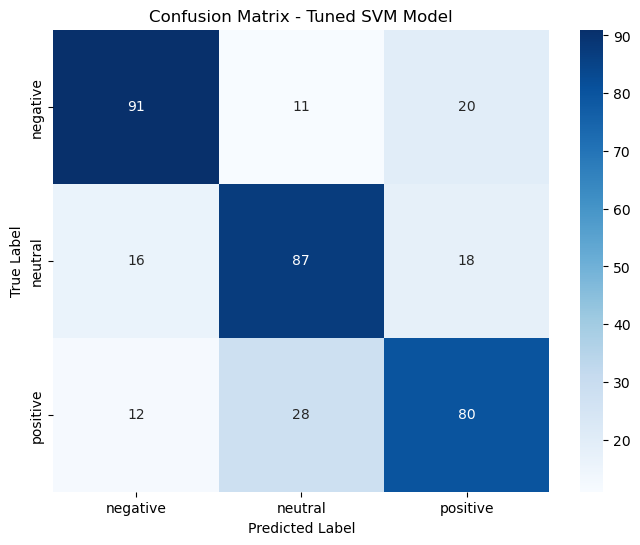

In [28]:

#  confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Tuned SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Ensemble techniques

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV


In [30]:
# Create individual base models
svm_classifier = SVC(probability=True, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
naive_bayes = MultinomialNB()


In [31]:
# Voting Classifier without hyperparameter tuning
voting_classifier_without_tuning = VotingClassifier(
    estimators=[
        ('svm', svm_classifier),
        ('logistic', logistic_regression),
        ('naive_bayes', naive_bayes)
    ],
    voting='soft'  # 'soft' for probability voting, 'hard' for majority voting
)

In [32]:
# Fit and evaluate the model without hyperparameter tuning
voting_classifier_without_tuning.fit(X_train_tfidf, y_train)
y_pred_without_tuning = voting_classifier_without_tuning.predict(X_test_tfidf)

accuracy_without_tuning = accuracy_score(y_test, y_pred_without_tuning)
classification_report_without_tuning = classification_report(y_test, y_pred_without_tuning)

In [33]:
# Save the model without hyperparameter tuning
joblib.dump(voting_classifier_without_tuning, 'voting_classifier_without_tuning_model.pkl')

['voting_classifier_without_tuning_model.pkl']

In [34]:
print("Voting Classifier Without Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_without_tuning}")
print("Classification Report:\n", classification_report_without_tuning)
print("Model without hyperparameter tuning saved.")

Voting Classifier Without Hyperparameter Tuning:
Accuracy: 0.6749311294765841
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       122
           1       0.69      0.60      0.64       121
           2       0.62      0.70      0.66       120

    accuracy                           0.67       363
   macro avg       0.68      0.67      0.67       363
weighted avg       0.68      0.67      0.67       363

Model without hyperparameter tuning saved.


###  Voting Classifier with hyperparameter tuning

In [35]:
# Parameter grid for Grid Search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 1],
    'logistic__C': [0.1, 1, 10, 100],
    'naive_bayes__alpha': [0.1, 0.5, 1.0]
}


In [36]:
voting_classifier_with_tuning = VotingClassifier(
    estimators=[
        ('svm', svm_classifier),
        ('logistic', logistic_regression),
        ('naive_bayes', naive_bayes)
    ],
    voting='soft'  # 'soft' for probability voting, 'hard' for majority voting
)


In [37]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(voting_classifier_with_tuning, param_grid, cv=5, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('svm',
                                                     SVC(probability=True,
                                                         random_state=42)),
                                                    ('logistic',
                                                     LogisticRegression(random_state=42)),
                                                    ('naive_bayes',
                                                     MultinomialNB())],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 1, 10, 100],
                         'naive_bayes__alpha': [0.1, 0.5, 1.0],
                         'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.1, 1],
                         'svm__kernel': ['linear', 'rbf', 'poly']})

In [38]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("\nBest Hyperparameters:", best_params)


Best Hyperparameters: {'logistic__C': 0.1, 'naive_bayes__alpha': 0.5, 'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [39]:

# Predictions on the test set using the best model
y_pred_with_tuning = grid_search.predict(X_test_tfidf)

In [40]:
# Evaluate the tuned model
accuracy_with_tuning = accuracy_score(y_test, y_pred_with_tuning)
classification_report_with_tuning = classification_report(y_test, y_pred_with_tuning)

In [41]:
# Save the model with hyperparameter tuning
joblib.dump(grid_search.best_estimator_, 'voting_classifier_with_tuning_model.pkl')

['voting_classifier_with_tuning_model.pkl']

In [42]:

print("\nVoting Classifier With Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_with_tuning}")
print("Classification Report:\n", classification_report_with_tuning)
print("Model with hyperparameter tuning saved.")


Voting Classifier With Hyperparameter Tuning:
Accuracy: 0.696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       122
           1       0.71      0.64      0.68       121
           2       0.65      0.70      0.67       120

    accuracy                           0.70       363
   macro avg       0.70      0.70      0.70       363
weighted avg       0.70      0.70      0.70       363

Model with hyperparameter tuning saved.


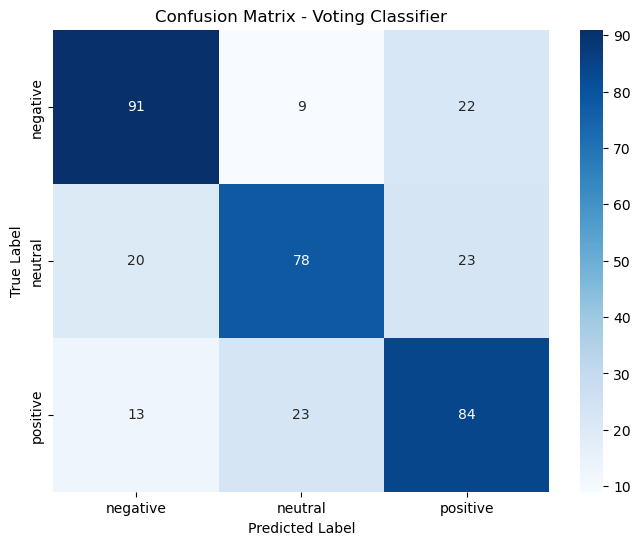

In [43]:
# Confusion matrix for Voting Classifier
conf_matrix_voting = confusion_matrix(y_test, y_pred_with_tuning)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Prediction using Model

In [44]:
#Prediction
# Prediction on new data
new_comments = [
    "I love this trailer! It's amazing.",
    "The trailer is terrible, and I'm very disappointed.",
    "waiting",
]

In [45]:
import joblib

# Loading the saved SVM model
loaded_svm_model = joblib.load('svm_tuned_model.pkl')



# Preprocessing
new_comments_processed = [preprocess_text(comment) for comment in new_comments]

# Converting the processed comments to TF-IDF features
new_comments_tfidf = tfidf_vectorizer.transform(new_comments_processed)

new_comments_predictions = loaded_svm_model.predict(new_comments_tfidf)

# numerical  to sentiment labels
new_comments_sentiments = label_encoder.inverse_transform(new_comments_predictions)

for comment, sentiment in zip(new_comments, new_comments_sentiments):
    print(f"Comment: {comment}\nPredicted Sentiment: {sentiment}\n")


Comment: I love this trailer! It's amazing.
Predicted Sentiment: positive

Comment: The trailer is terrible, and I'm very disappointed.
Predicted Sentiment: negative

Comment: waiting
Predicted Sentiment: neutral

